In [1]:
import pandas as pd
import numpy as np
import string

import warnings

from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore')

In [11]:
data = pd.read_csv(r'C:\Users\Pakistan\Downloads\spam_ham_dataset.csv')
print(data.head())
print(data.shape)

   Unnamed: 0 label                                               text  \
0         605   ham  Subject: enron methanol ; meter # : 988291\r\n...   
1        2349   ham  Subject: hpl nom for january 9 , 2001\r\n( see...   
2        3624   ham  Subject: neon retreat\r\nho ho ho , we ' re ar...   
3        4685  spam  Subject: photoshop , windows , office . cheap ...   
4        2030   ham  Subject: re : indian springs\r\nthis deal is t...   

   label_num  
0          0  
1          0  
2          0  
3          1  
4          0  
(5171, 4)


In [12]:
Ham_msg = data[data['label'] == 'Ham']
Spam_msg = data[data['label'] == 'Spam']

In [13]:
Ham_msg_balanced = Ham_msg.sample(n=len(Spam_msg), random_state=42)
balanced_data = pd.concat([Ham_msg_balanced, Spam_msg]).reset_index(drop=True)
print(balanced_data.head())
print(balanced_data['label'].value_counts())

Empty DataFrame
Columns: [Unnamed: 0, label, text, label_num]
Index: []
Series([], Name: count, dtype: int64)


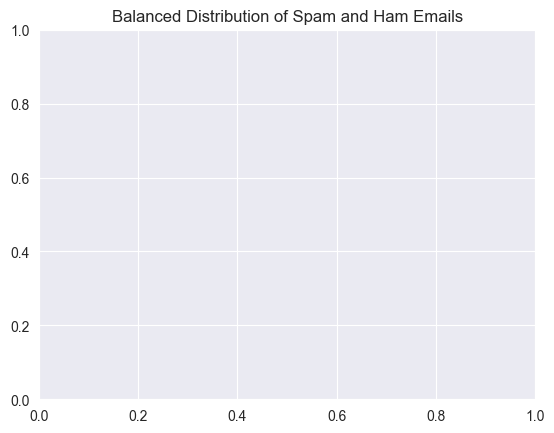

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='label', data=balanced_data)
plt.title('Balanced Distribution of Spam and Ham Emails')
plt.show()

In [6]:
balanced_data['text'] = balanced_data['text'].str.replace('Subject', '')
punctuations_list = string.punctuation
def remove_punctuations(text):
    temp = str.maketrans('', '', punctuations_list)
    return text.translate(temp)

balanced_data['text'] = balanced_data['text'].apply(lambda x: remove_punctuations(x))
print(balanced_data.head())

Empty DataFrame
Columns: [Unnamed: 0, label, text, label_num]
Index: []


In [7]:
X = balanced_data['text'].values
y = balanced_data['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [48]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB


vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

model = MultinomialNB()
model.fit(X_train_vec, y_train)

NameError: name 'X_train' is not defined

In [49]:
score = model.score(X_test_vec, y_test)
print(f"Accuracy on spam/ham detection: {score:.2f}")

sample = ["Congratulations, you've won a prize! Click here to claim."]
sample_vec = vectorizer.transform(sample)
prediction = model.predict(sample_vec)
print("Prediction for sample:", prediction[0])

NameError: name 'model' is not defined